In [8]:
import matplotlib.pyplot as plt

In [9]:
import numpy as np
import cv2

In [10]:
from numpy.linalg import inv

In [11]:
%matplotlib inline

In [12]:
# define names of each possible ArUco tag OpenCV supports
ARUCO_DICT = {
	"DICT_4X4_50": cv2.aruco.DICT_4X4_50,
	"DICT_4X4_100": cv2.aruco.DICT_4X4_100,
	"DICT_4X4_250": cv2.aruco.DICT_4X4_250,
	"DICT_4X4_1000": cv2.aruco.DICT_4X4_1000,
	"DICT_5X5_50": cv2.aruco.DICT_5X5_50,
	"DICT_5X5_100": cv2.aruco.DICT_5X5_100,
	"DICT_5X5_250": cv2.aruco.DICT_5X5_250,
	"DICT_5X5_1000": cv2.aruco.DICT_5X5_1000,
	"DICT_6X6_50": cv2.aruco.DICT_6X6_50,
	"DICT_6X6_100": cv2.aruco.DICT_6X6_100,
	"DICT_6X6_250": cv2.aruco.DICT_6X6_250,
	"DICT_6X6_1000": cv2.aruco.DICT_6X6_1000,
	"DICT_7X7_50": cv2.aruco.DICT_7X7_50,
	"DICT_7X7_100": cv2.aruco.DICT_7X7_100,
	"DICT_7X7_250": cv2.aruco.DICT_7X7_250,
	"DICT_7X7_1000": cv2.aruco.DICT_7X7_1000,
	"DICT_ARUCO_ORIGINAL": cv2.aruco.DICT_ARUCO_ORIGINAL,
	"DICT_APRILTAG_16h5": cv2.aruco.DICT_APRILTAG_16h5,
	"DICT_APRILTAG_25h9": cv2.aruco.DICT_APRILTAG_25h9,
	"DICT_APRILTAG_36h10": cv2.aruco.DICT_APRILTAG_36h10,
	"DICT_APRILTAG_36h11": cv2.aruco.DICT_APRILTAG_36h11
}

In [13]:
Type = 'DICT_5X5_100'

In [14]:
!ls ./aruco_recv/

ls: cannot access './aruco_recv/': No such file or directory


https://velog.io/@k_joon_/Vision

In [15]:
k = np.array([[663.53906823,   0.,         620.95123764], 
                [  0.,         664.13958877, 353.79669005],
                [  0.,           0.,           1.        ]])

In [16]:
d = np.array([[-0.00746391,  0.06038115, -0.0001621,   0.00045486, -0.04346805]])

In [17]:
k, d

(array([[663.53906823,   0.        , 620.95123764],
        [  0.        , 664.13958877, 353.79669005],
        [  0.        ,   0.        ,   1.        ]]),
 array([[-0.00746391,  0.06038115, -0.0001621 ,  0.00045486, -0.04346805]]))

In [18]:
!ls E_ArUco/

ls: cannot access 'E_ArUco/': No such file or directory


In [19]:
def get_matrix(frame):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    arucoDict = cv2.aruco.getPredefinedDictionary(ARUCO_DICT[Type])
    arucoParams = cv2.aruco.DetectorParameters_create()

    corners1, ids1, _ = cv2.aruco.detectMarkers(gray, arucoDict, parameters=arucoParams)
    rvecs1, tvecs1, _ = cv2.aruco.estimatePoseSingleMarkers(corners1, 0.105, k, d)
    R, _ = cv2.Rodrigues(rvecs1[0])

    return ids1, rvecs1, R, tvecs1

In [20]:
unit_x = np.array([[1.0], [0.0], [0.0]])
unit_y = np.array([[0.0], [1.0], [0.0]])
unit_z = np.array([[0.0], [0.0], [1.0]])

In [21]:
frame = cv2.imread('./E_ArUco/35_0.jpg')

ids1, rvecs1, R, tvecs1 = get_matrix(frame)
print(ids1, rvecs1, R, tvecs1)

cv2.aruco.drawAxis(frame, k, d, rvecs1[0], tvecs1[0], 0.1)

x_T = np.dot(R, unit_x)
y_T = np.dot(R, unit_y)
z_T = np.dot(R, unit_z)

axis_size = 100
axis_center = (150, 150)
cv2.line(frame, axis_center, (int(axis_center[0] + axis_size*x_T[0]), int(axis_center[1] + axis_size*x_T[1])), (0, 0, 255), 2)
cv2.line(frame, axis_center, (int(axis_center[0] + axis_size*y_T[0]), int(axis_center[1] + axis_size*y_T[1])), (0, 255, 0), 2)
cv2.line(frame, axis_center, (int(axis_center[0] + axis_size*z_T[0]), int(axis_center[1] + axis_size*z_T[1])), (255, 0, 0), 2)

print(x_T.T, y_T.T, z_T.T)

plt.figure(figsize=(10,10))
plt.imshow(frame)
plt.show()

[ WARN:0@121.560] global loadsave.cpp:264 findDecoder imread_('./E_ArUco/35_0.jpg'): can't open/read file: check file path/integrity


error: OpenCV(4.10.0-dev) /home/g1/opencv/modules/imgproc/src/color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


[[6]] [[[ 2.88359468  1.04756771 -0.04869828]]] [[ 0.76668949  0.64200004 -0.0048138 ]
 [ 0.63967784 -0.76451294 -0.0795753 ]
 [-0.05476756  0.05793026 -0.99681723]] [[[-0.02522272 -0.03227161  0.35005855]]]
[[ 0.76668949  0.63967784 -0.05476756]] [[ 0.64200004 -0.76451294  0.05793026]] [[-0.0048138  -0.0795753  -0.99681723]]


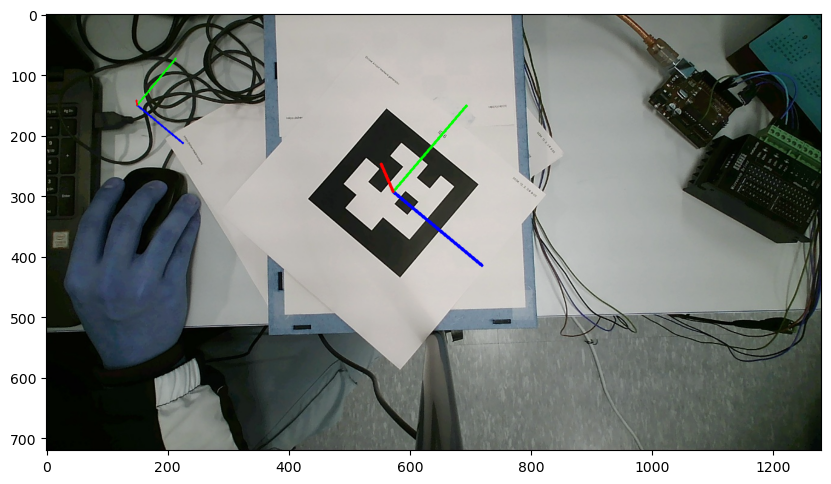

In [ ]:
frame = cv2.imread('./E_ArUco/35_45.jpg')

ids1, rvecs1, R, tvecs1 = get_matrix(frame)
print(ids1, rvecs1, R, tvecs1)

cv2.aruco.drawAxis(frame, k, d, rvecs1[0], tvecs1[0], 0.1)

x_T = np.dot(R, unit_x)
y_T = np.dot(R, unit_y)
z_T = np.dot(R, unit_z)

axis_size = 100
axis_center = (150, 150)
cv2.line(frame, axis_center, (int(axis_center[0] + axis_size*x_T[0]), int(axis_center[1] + axis_size*x_T[1])), (0, 0, 255), 2)
cv2.line(frame, axis_center, (int(axis_center[0] + axis_size*y_T[0]), int(axis_center[1] + axis_size*y_T[1])), (0, 255, 0), 2)
cv2.line(frame, axis_center, (int(axis_center[0] + axis_size*z_T[0]), int(axis_center[1] + axis_size*z_T[1])), (255, 0, 0), 2)

print(x_T.T, y_T.T, z_T.T)

plt.figure(figsize=(10,10))
plt.imshow(frame)
plt.show()

[[6]] [[[ 2.19581384  2.20061325 -0.11083224]]] [[-0.0032109   0.99959001 -0.0284517 ]
 [ 0.99739045  0.00114915 -0.07218701]
 [-0.07212472 -0.02860924 -0.99698522]] [[[ 0.0358598  -0.0238686   0.34945465]]]
[[-0.0032109   0.99739045 -0.07212472]] [[ 0.99959001  0.00114915 -0.02860924]] [[-0.0284517  -0.07218701 -0.99698522]]


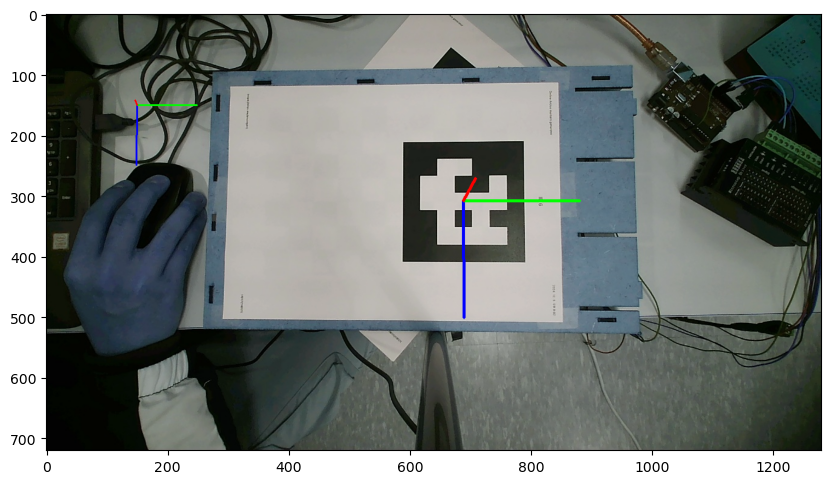

In [ ]:
frame = cv2.imread('./E_ArUco/35_90.jpg')

ids1, rvecs1, R, tvecs1 = get_matrix(frame)
print(ids1, rvecs1, R, tvecs1)

cv2.aruco.drawAxis(frame, k, d, rvecs1[0], tvecs1[0], 0.1)

x_T = np.dot(R, unit_x)
y_T = np.dot(R, unit_y)
z_T = np.dot(R, unit_z)

axis_size = 100
axis_center = (150, 150)
cv2.line(frame, axis_center, (int(axis_center[0] + axis_size*x_T[0]), int(axis_center[1] + axis_size*x_T[1])), (0, 0, 255), 2)
cv2.line(frame, axis_center, (int(axis_center[0] + axis_size*y_T[0]), int(axis_center[1] + axis_size*y_T[1])), (0, 255, 0), 2)
cv2.line(frame, axis_center, (int(axis_center[0] + axis_size*z_T[0]), int(axis_center[1] + axis_size*z_T[1])), (255, 0, 0), 2)

print(x_T.T, y_T.T, z_T.T)

plt.figure(figsize=(10,10))
plt.imshow(frame)
plt.show()

[[6]] [[[-2.9455498   0.07716076 -1.38049495]]] [[ 0.64002658 -0.09035124  0.76302204]
 [ 0.0047581  -0.99257703 -0.1215245 ]
 [ 0.76833804  0.08140944 -0.63484578]] [[[ 0.00931128 -0.03274145  0.50756004]]]
[[0.64002658 0.0047581  0.76833804]] [[-0.09035124 -0.99257703  0.08140944]] [[ 0.76302204 -0.1215245  -0.63484578]]


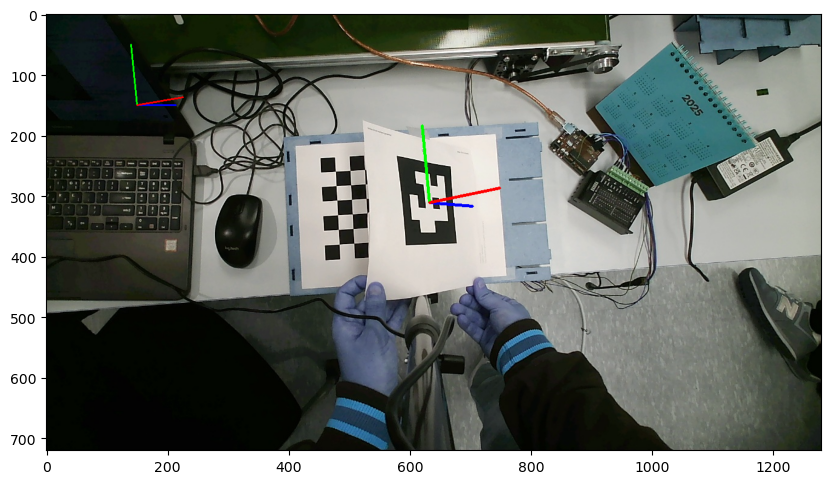

In [ ]:
frame = cv2.imread('./E_ArUco/57_0.jpg')

ids1, rvecs1, R, tvecs1 = get_matrix(frame)
print(ids1, rvecs1, R, tvecs1)

cv2.aruco.drawAxis(frame, k, d, rvecs1[0], tvecs1[0], 0.1)

x_T = np.dot(R, unit_x)
y_T = np.dot(R, unit_y)
z_T = np.dot(R, unit_z)

axis_size = 100
axis_center = (150, 150)
cv2.line(frame, axis_center, (int(axis_center[0] + axis_size*x_T[0]), int(axis_center[1] + axis_size*x_T[1])), (0, 0, 255), 2)
cv2.line(frame, axis_center, (int(axis_center[0] + axis_size*y_T[0]), int(axis_center[1] + axis_size*y_T[1])), (0, 255, 0), 2)
cv2.line(frame, axis_center, (int(axis_center[0] + axis_size*z_T[0]), int(axis_center[1] + axis_size*z_T[1])), (255, 0, 0), 2)

print(x_T.T, y_T.T, z_T.T)

plt.figure(figsize=(10,10))
plt.imshow(frame)
plt.show()

[[6]] [[[ 2.31165091 -0.09134406  0.05368477]]] [[ 0.99648506 -0.08319607  0.00979527]
 [-0.04903515 -0.67409496 -0.73701529]
 [ 0.06791972  0.73394441 -0.67580508]] [[[-0.00185266 -0.04634906  0.51357499]]]
[[ 0.99648506 -0.04903515  0.06791972]] [[-0.08319607 -0.67409496  0.73394441]] [[ 0.00979527 -0.73701529 -0.67580508]]


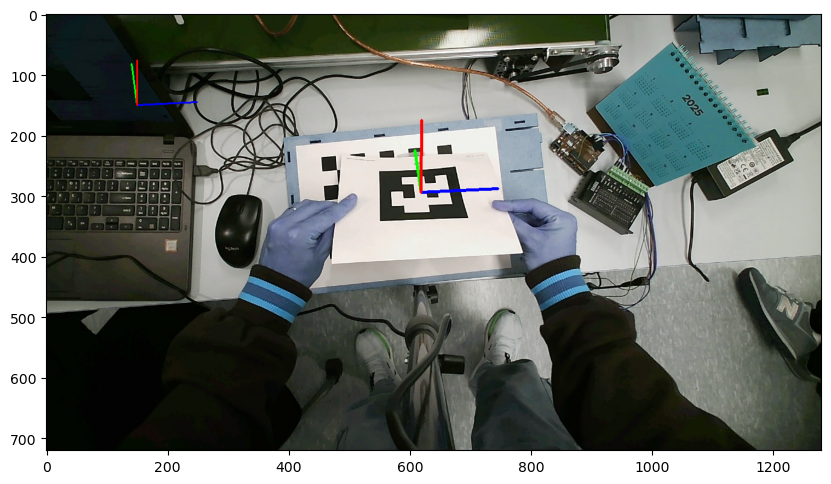

In [ ]:
frame = cv2.imread('./E_ArUco/57_1.jpg')

ids1, rvecs1, R, tvecs1 = get_matrix(frame)
print(ids1, rvecs1, R, tvecs1)

cv2.aruco.drawAxis(frame, k, d, rvecs1[0], tvecs1[0], 0.1)

x_T = np.dot(R, unit_x)
y_T = np.dot(R, unit_y)
z_T = np.dot(R, unit_z)

axis_size = 100
axis_center = (150, 150)
cv2.line(frame, axis_center, (int(axis_center[0] + axis_size*x_T[0]), int(axis_center[1] + axis_size*x_T[1])), (0, 0, 255), 2)
cv2.line(frame, axis_center, (int(axis_center[0] + axis_size*y_T[0]), int(axis_center[1] + axis_size*y_T[1])), (0, 255, 0), 2)
cv2.line(frame, axis_center, (int(axis_center[0] + axis_size*z_T[0]), int(axis_center[1] + axis_size*z_T[1])), (255, 0, 0), 2)

print(x_T.T, y_T.T, z_T.T)

plt.figure(figsize=(10,10))
plt.imshow(frame)
plt.show()

[[21]
 [ 6]] [[[ 2.83588878 -1.22027261  0.70012466]]

 [[ 2.94096742 -0.08773375  0.55990384]]] [[ 0.60505876 -0.68520036  0.40546809]
 [-0.69585196 -0.70257912 -0.14890479]
 [ 0.38690303 -0.19204962 -0.90189966]] [[[ 1.10065644e+00  2.14661444e-01  1.94798595e+00]]

 [[-2.45177594e-01 -1.54978042e-04  5.31602437e-01]]]
[[ 0.60505876 -0.69585196  0.38690303]] [[-0.68520036 -0.70257912 -0.19204962]] [[ 0.40546809 -0.14890479 -0.90189966]]


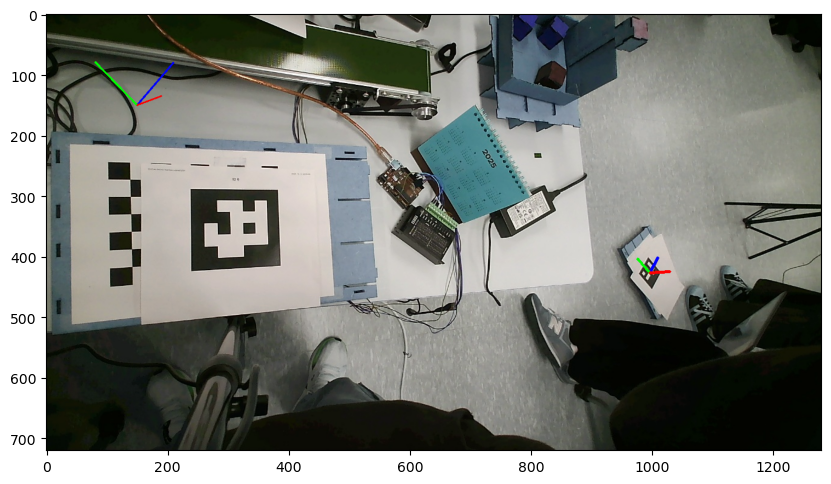

In [ ]:
frame = cv2.imread('./E_ArUco/57_2.jpg')

ids1, rvecs1, R, tvecs1 = get_matrix(frame)
print(ids1, rvecs1, R, tvecs1)

cv2.aruco.drawAxis(frame, k, d, rvecs1[0], tvecs1[0], 0.1)

x_T = np.dot(R, unit_x)
y_T = np.dot(R, unit_y)
z_T = np.dot(R, unit_z)

axis_size = 100
axis_center = (150, 150)
cv2.line(frame, axis_center, (int(axis_center[0] + axis_size*x_T[0]), int(axis_center[1] + axis_size*x_T[1])), (0, 0, 255), 2)
cv2.line(frame, axis_center, (int(axis_center[0] + axis_size*y_T[0]), int(axis_center[1] + axis_size*y_T[1])), (0, 255, 0), 2)
cv2.line(frame, axis_center, (int(axis_center[0] + axis_size*z_T[0]), int(axis_center[1] + axis_size*z_T[1])), (255, 0, 0), 2)

print(x_T.T, y_T.T, z_T.T)

plt.figure(figsize=(10,10))
plt.imshow(frame)
plt.show()

[[6]] [[[2.6627807  0.03406659 0.03942478]]] [[ 0.99927746  0.01732883  0.03382691]
 [ 0.03095569 -0.88746877 -0.45982706]
 [ 0.02205207  0.46054195 -0.88736397]] [[[-0.03117545  0.20307603  0.54473931]]]
[[0.99927746 0.03095569 0.02205207]] [[ 0.01732883 -0.88746877  0.46054195]] [[ 0.03382691 -0.45982706 -0.88736397]]


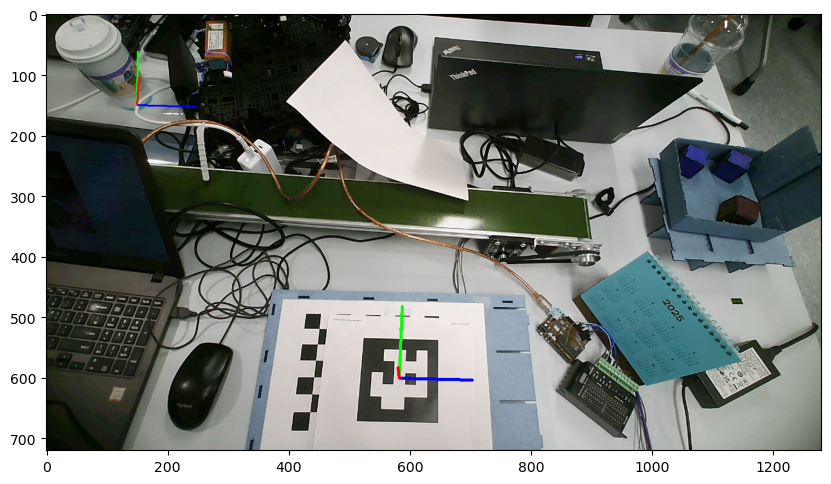

In [ ]:
frame = cv2.imread('./E_ArUco/57_3.jpg')

ids1, rvecs1, R, tvecs1 = get_matrix(frame)
print(ids1, rvecs1, R, tvecs1)

cv2.aruco.drawAxis(frame, k, d, rvecs1[0], tvecs1[0], 0.1)

x_T = np.dot(R, unit_x)
y_T = np.dot(R, unit_y)
z_T = np.dot(R, unit_z)

axis_size = 100
axis_center = (150, 150)
cv2.line(frame, axis_center, (int(axis_center[0] + axis_size*x_T[0]), int(axis_center[1] + axis_size*x_T[1])), (0, 0, 255), 2)
cv2.line(frame, axis_center, (int(axis_center[0] + axis_size*y_T[0]), int(axis_center[1] + axis_size*y_T[1])), (0, 255, 0), 2)
cv2.line(frame, axis_center, (int(axis_center[0] + axis_size*z_T[0]), int(axis_center[1] + axis_size*z_T[1])), (255, 0, 0), 2)

print(x_T.T, y_T.T, z_T.T)

plt.figure(figsize=(10,10))
plt.imshow(frame)
plt.show()